
Dataset Preview:
   sepal length  sepal width  petal length  petal width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

Missing Values:
sepal length    0
sepal width     0
petal length    0
petal width     0
species         0
dtype: int64

Explained Variance Ratio: [0.72770452 0.23030523]
Cumulative Explained Variance: [0.72770452 0.95800975]


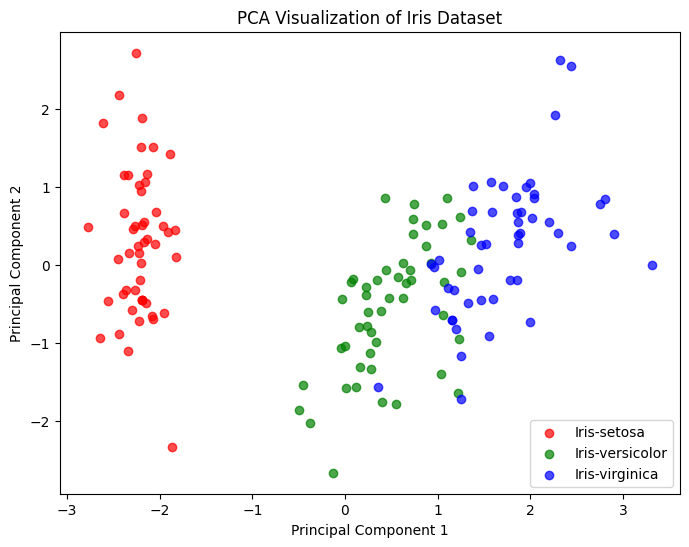

In [7]:
# Install ucimlrepo
!pip install ucimlrepo

# Fetch dataset
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the Iris dataset using ucimlrepo
iris = fetch_ucirepo(id=53)  # Iris dataset ID

# Convert to pandas DataFrame
data = iris.data.features.copy()
data['species'] = iris.data.targets


# Display the first few rows to verify the data
print("\nDataset Preview:")
print(data.head())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Map species to numerical values for consistency
species_mapping = {"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2}
data['species'] = data['species'].map(species_mapping)

# Separate features and target variable
features = data.iloc[:, :-1]  # Exclude the species column
target = data['species']

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Perform PCA to reduce dimensions to 2
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_scaled)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=principal_components, columns=["PC1", "PC2"])
pca_df['species'] = target

# Explained variance ratio
print("\nExplained Variance Ratio:", pca.explained_variance_ratio_)
print("Cumulative Explained Variance:", np.cumsum(pca.explained_variance_ratio_))

# Visualize the PCA results
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b']
species_labels = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
for species, color in zip([0, 1, 2], colors):
    plt.scatter(
        pca_df[pca_df['species'] == species]['PC1'],
        pca_df[pca_df['species'] == species]['PC2'],
        label=species_labels[species],
        alpha=0.7,
        color=color
    )

plt.title("PCA Visualization of Iris Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()
